# Visualização de Dados

Uma parte fundamental do kit de ferramentas do cientista de dados é a visualização de dados. Embora seja muito fácil criar visualizações, é muito mais difícil produzir *boas* visualizações.

Existem dois usos principais para visualização de dados:

* Para explorar dados;
* Para comunicar dados.

Nesta aula, nos concentraremos em desenvolver as habilidades que você precisará para começar a explorar os seus próprios dados e produzir as visualizações que usaremos ao longo do curso. Como a maioria dos tópicos que veremos, a visualização de dados é um rico campo de estudo que merece o seu próprio curso. No entanto, vamos tentar dar uma ideia do que contribui para uma boa visualização e o que não contribui.

## matplotlib

Existe uma grande variedade de ferramentas para visualizar dados. Nós estaremos usando a biblioteca `matplotlib`, que é amplamente utilizada (embora mostre sua idade). Se você estiver interessado em produzir visualizações interativas elaboradas para a Web, provavelmente não é a escolha certa, mas para gráficos de barras simples, gráficos de linhas e diagramas de dispersão, funciona muito bem.

Em particular, estaremos usando o módulo `matplotlib.pyplot`. Em seu uso mais simples, o `pyplot` mantém um estado interno no qual você constrói uma visualização passo a passo. Quando terminar, você poderá salvá-lo (com `savefig()`) ou exibi-lo (com `show()`).

Abaixo um exemplo de uma figura bem simples que pode ser criada com o `matplotlib`. Mas antes, vamos habilitar a exibição das figuras geradas pelo matplotlib no jupyter:

In [17]:
matplotlib inline

SyntaxError: invalid syntax (<ipython-input-17-f18922216956>, line 1)

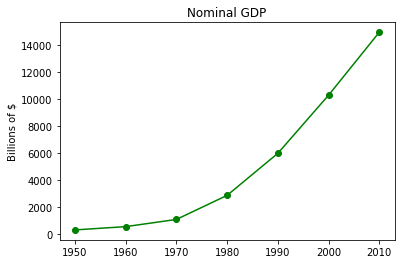

In [18]:
from matplotlib import pyplot as plt

anos = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
pib = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# cria um gráfico de linhas, com os anos no eixo x e o pib no eixo y
plt.plot(anos, pib, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")

plt.show()

Fazer gráficos com qualidade para publicações é mais complicado e está além do escopo desta aula (e curso). Há muitas maneiras de personalizar seus gráficos com (por exemplo) rótulos de eixo, estilos de linha e marcadores de ponto. Em vez de tentar um tratamento abrangente dessas opções, vamos usar (e chamar atenção de) algumas delas em nossos exemplos.

Embora não usaremos muitas dessas funcionalidades, o `matplotlib` é capaz de produzir gráficos complicados dentro de outros gráficos, formatações sofisticadas e visualizações interativas. Leia a [documentação](https://matplotlib.org/) do `matplotlib` caso queira ir mais fundo do que neste curso. 

## Salvando Figuras em Arquivo

Um recurso interessante do Matplotlib é a capacidade de salvar figuras em uma ampla variedade de formatos. Salvar uma figura pode ser feito usando o comando `savefig()`. Vamos, por exemplo, plotar as funções seno e cosseno.

In [19]:
import math
x = [x * 0.1 for x in range(-100, 100)]
senx = [math.sin(xs) for xs in x]
cosx = [math.cos(xs) for xs in x]

Primeiro, precisamos salvar o objeto da figura:

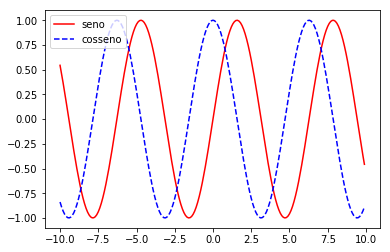

In [20]:
fig = plt.figure()
plt.plot(x, senx, 'r-', label="seno")
plt.plot(x, cosx, 'b--', label="cosseno");
plt.legend(loc=2)
plt.show()

Para salvar um gráfico como um arquivo PNG, você pode executar isto:

In [21]:
fig.savefig('seno_e_cosseno.png')

Para confirmar que contém o que achamos que ele contém, vamos usar o objeto `IPython Image` para exibir o conteúdo deste arquivo:

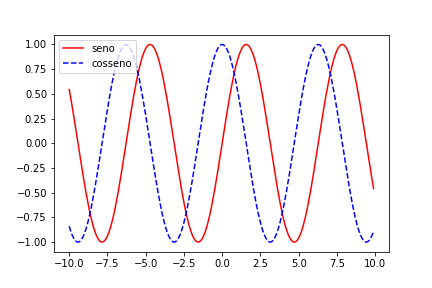

In [22]:
from IPython.display import Image
Image('seno_e_cosseno.png')

## Um adendo sobre cores

Há várias maneiras de colorir no `matplotlib`:

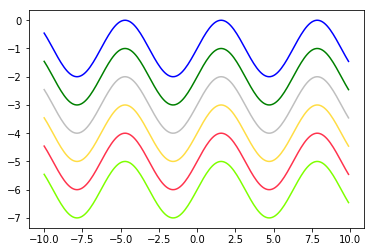

In [23]:
plt.plot(x, [y-1 for y in senx], color='blue')        # specify color by name
plt.plot(x, [y-2 for y in senx], color='g')           # short color code (rgbcmyk)
plt.plot(x, [y-3 for y in senx], color='0.75')        # Grayscale between 0 and 1
plt.plot(x, [y-4 for y in senx], color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, [y-5 for y in senx], color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, [y-6 for y in senx], color='chartreuse'); # all HTML color names supported
plt.show()

## Duas Interfaces pelo Preço de Uma

Um recurso potencialmente confuso do `Matplotlib` são suas interfaces duplas: uma conveniente interface baseada em estado no estilo `MATLAB` e uma interface orientada a objetos mais poderosa. Vamos destacar rapidamente as diferenças entre os dois aqui.

### Interface no estilo MATLAB

O `Matplotlib` foi originalmente escrito como uma alternativa do Python para usuários do `MATLAB`, e grande parte de sua sintaxe reflete esse fato. As ferramentas no estilo `MATLAB` estão contidas na interface `pyplot (plt)`. Por exemplo, o seguinte código provavelmente parecerá bastante familiar aos usuários do `MATLAB`:

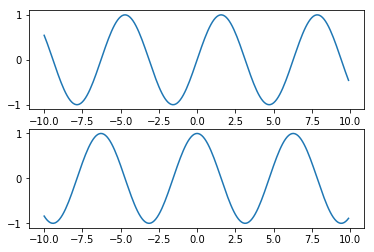

In [24]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, senx)

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, cosx);

É importante observar que essa interface é *stateful*: ela monitora a figura e os eixos "atuais", que são onde todos os comandos `plt` são aplicados. Você pode obter uma referência a eles usando as rotinas `plt.gcf()` (obter a figura atual) e `plt.gca()` (obter eixos atuais).

Embora essa interface com estado seja rápida e conveniente para plotagens simples, é fácil encontrar problemas. Por exemplo, depois que o segundo painel é criado, como podemos voltar e adicionar algo ao primeiro? Isso é possível dentro da interface no estilo MATLAB, mas um pouco desajeitado. Felizmente, existe uma maneira melhor.

### Interface orientada a objetos

A interface orientada a objetos está disponível para essas situações mais complicadas e para quando você quer mais controle sobre sua figura. Em vez de depender de alguma noção de uma figura ou eixos "ativos", na interface orientada a objetos, as funções de plotagem são métodos de objetos explícitos `Figure` e `Axes`. Para recriar o gráfico anterior usando esse estilo de plotagem, você pode fazer o seguinte:

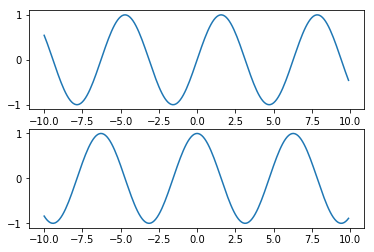

In [25]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, senx)
ax[1].plot(x, cosx);

Para gráficos mais simples, a escolha de qual estilo usar é, em grande parte, uma questão de preferência, mas a abordagem orientada a objetos pode se tornar uma necessidade à medida que os gráficos se tornam mais complicados. 

## Gráficos de barra

Um gráfico de barras é uma boa opção quando você deseja mostrar como uma quantidade varia entre alguns conjuntos discretos de itens. Por exemplo, o código abaixo mostra quantos *Oscars* foram ganhos por cada um de vários filmes:

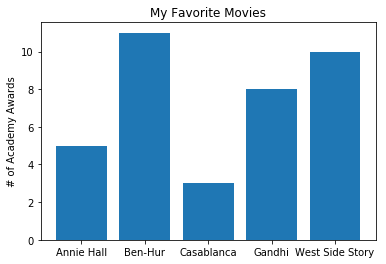

In [26]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# gráficos de barra com os filmes no eixo x e a quantidade de Oscars no eixo y
# no Python 2.* era muito mais difícil centralizar o nome dos filmes no eixo x
plt.bar(movies, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

plt.show()

É possível também usar a função `hist` para plotar histogramas de valores numéricos com intervalos discretos (ou em *bins*), a fim de explorar visualmente como os valores são distribuídos. No exemplo abaixo, plotaremos a distribuição das notas em `10` intervalos uniformemente distribuídos (`bins=10`) e dentro do intervalo de `0` a `100` (`range=100`).

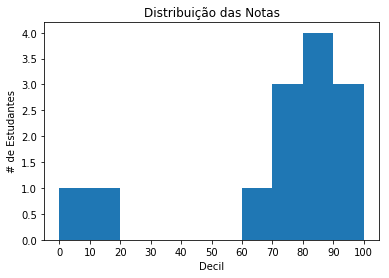

In [27]:
from collections import Counter
notas = [83,95,91,87,70,3,85,82,92,67,73,77,11]

plt.hist(notas, bins=10, range=(0,100))

# x-axis labels at 0, 10, ..., 100
plt.xticks([10 * i for i in range(11)])

plt.xlabel("Decil")
plt.ylabel("# de Estudantes")
plt.title("Distribuição das Notas")
plt.show()

Seja criterioso ao escolher os limites dos eixos. Ao criar gráficos de barras, pode ser muito ruim não colocar o seu eixo y começando em 0, pois essa é uma maneira fácil de enganar as pessoas:

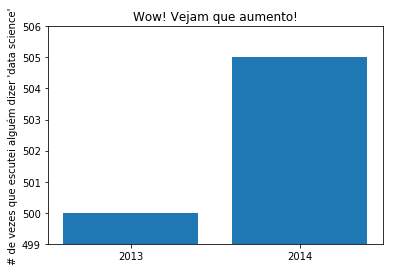

In [28]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar(years, mentions)

plt.xticks(years)
plt.ylabel("# de vezes que escutei alguém dizer 'data science'")

# define o os limites do eixo y:
plt.ylim(499,506)

plt.title("Wow! Vejam que aumento!")
plt.show()

Veja como a versão *sincera* do gráfico acima não é não impressionante:

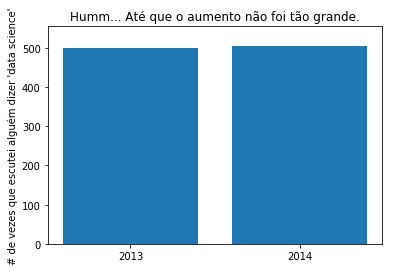

In [29]:
plt.bar(years, mentions)

plt.xticks(years)
plt.ylabel("# de vezes que escutei alguém dizer 'data science'")

plt.ylim(0, max(mentions)*1.1)
plt.title("Humm... Até que o aumento não foi tão grande.")
plt.show()

Podemos também comparar histogramas em um mesmo gráfico.

Considere, por exemplo, as notas de uma outra turma:

In [30]:
notas2 = [58,76,99,45,78,35,47,98,64,62,24,86,61]

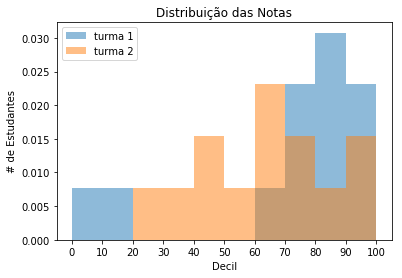

In [31]:
kwargs = dict(histtype='stepfilled', alpha=0.5, normed=True, bins=10, range=(0,100))
plt.hist(notas, label="turma 1", **kwargs)
plt.hist(notas2, label="turma 2", **kwargs)

plt.xlabel("Decil")
plt.ylabel("# de Estudantes")
plt.title("Distribuição das Notas")
plt.xticks([10 * i for i in range(11)])
plt.legend(loc=2)
plt.show()

Algumas vezes, dependendo dos nossos dados, os gráficos de barras podem ser muito pouco informativos. 

Considere, por exemplo, uma amostra extraída de uma distribuição de Pareto:

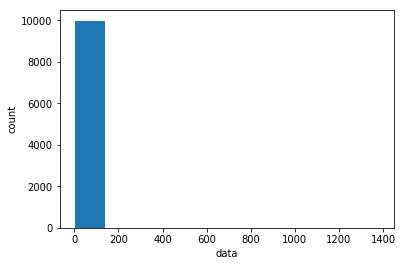

In [32]:
import numpy as np
a, m = 1.5, 2.  # shape and mode
data = (np.random.pareto(a, 10000) + 1) * m
plt.hist(data)
plt.xlabel('data')
plt.ylabel('count')
plt.show()

Neste caso, uma boa ideia é alterar a escala dos eixos. De forma muito simples, podemos transformar as escala do eixo y de linear para logarítmica:

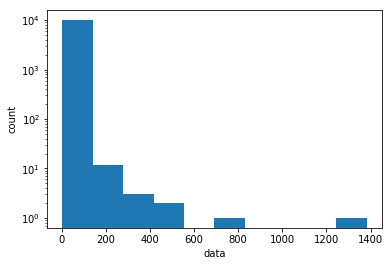

In [33]:
plt.hist(data, log=True)
plt.xlabel('data')
plt.ylabel('count')
plt.show()

Para alterar a escala do eixo x, precisamos fazer um pouco mais:

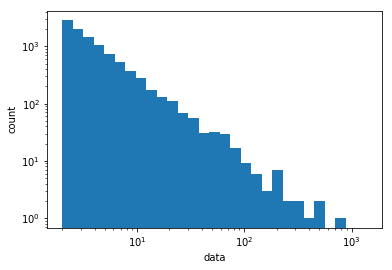

In [34]:
minv = min(data)
maxv = max(data)
lenbins = 30
logbins = np.logspace(np.log10(minv),np.log10(maxv),lenbins)
plt.hist(data, bins=logbins, log=True)
plt.xscale('log')
plt.xlabel('data')
plt.ylabel('count')
plt.show()

## Gráficos de linha

Como foi visto, podemos criar gráficos de linha usando `plt.plot()`. Essa é uma boa opção para exibir *tendências*:

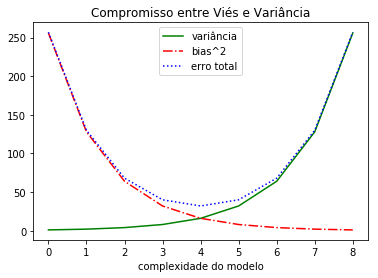

In [35]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]

xs = [i for i, _ in enumerate(variance)]

# podemos fazer múltiplas chamadas para plt.plot
# para mostrar múltiplas séries no mesmo gráfico
plt.plot(xs, variance, 'g-', label='variância')
plt.plot(xs, bias_squared, 'r-.', label='bias^2')
plt.plot(xs, total_error, 'b:', label='erro total')

# porque definimos os labels de cada série, 
# ganhamos uma legenda de graça
# loc=9 coloca a legenda na posição 9, ou "top center"

plt.legend(loc=9)
plt.xlabel("complexidade do modelo")
plt.title("Compromisso entre Viés e Variância")
plt.show()

## Gráficos de dispersão (*scatterplots*)

Um gráfico de dispersão é a escolha certa para visualizar a relação entre dois conjuntos de dados pareados. Por exemplo, abaixo mostramos a relação entre o número de amigos e o número de minutos gastos por usuários em uma rede social (fictícia, claro):

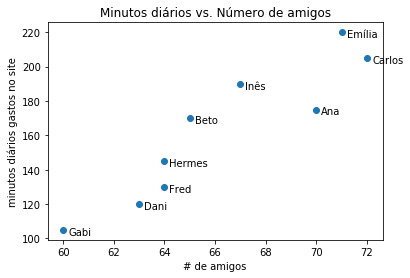

In [36]:
amigos = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutos = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['Ana', 'Beto', 'Carlos', 'Dani', 'Emília', 'Fred', 'Gabi', 'Hermes', 'Inês']

plt.scatter(amigos, minutos)

# label each point
for label, friend_count, minute_count in zip(labels, amigos, minutos):
    plt.annotate(label,
                 xy=(friend_count, minute_count), # associa o label à sua coordenada x,y
                 xytext=(5, -5), #com um pequeno offset
                 textcoords='offset points')

plt.title("Minutos diários vs. Número de amigos")
plt.xlabel("# de amigos")
plt.ylabel("minutos diários gastos no site")
plt.show()

Há muitos tipos de marcadores no `matplotlib`:

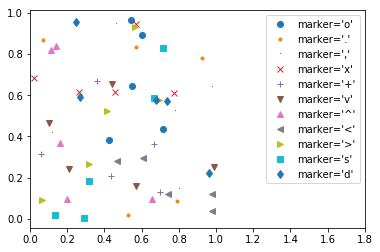

In [37]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Se você estiver espalhando variáveis comparáveis, poderá obter uma imagem enganosa se permitir que o `matplotlib` escolha a escala:

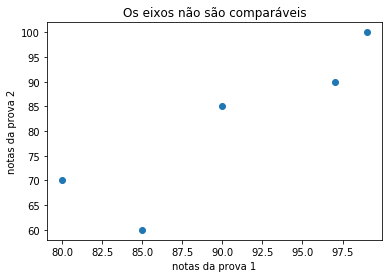

In [38]:
notas_prova_1 = [ 99, 90, 85, 97, 80]
notas_prova_2 = [100, 85, 60, 90, 70]

plt.scatter(notas_prova_1, notas_prova_2)
plt.title("Os eixos não são comparáveis")
plt.xlabel("notas da prova 1")
plt.ylabel("notas da prova 2")
plt.show()

Se incluirmos uma chamada para `plt.axis("equal")`, o gráfico mostrará com mais precisão que a maior parte da variação ocorre na prova 2.

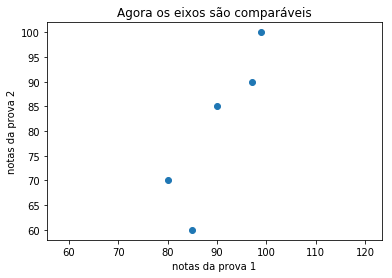

In [39]:
plt.scatter(notas_prova_1, notas_prova_2)

plt.axis("equal")

plt.title("Agora os eixos são comparáveis")
plt.xlabel("notas da prova 1")
plt.ylabel("notas da prova 2")

plt.show()

Também podemos usar a lógica dos gráficos de dispersão para plotar histogramas na escala *loglog*. 

Primeiro, lembre como era o histograma usando um gráfico de barras:

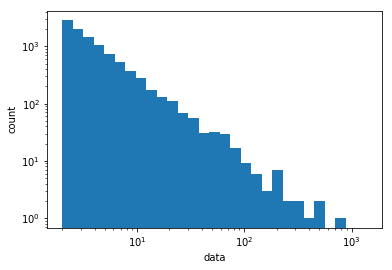

In [40]:
minv = min(data)
maxv = max(data)
lenbins = 30
logbins = np.logspace(np.log10(minv),np.log10(maxv),lenbins)
plt.hist(data, bins=logbins, log=True)
plt.xscale('log')
plt.xlabel('data')
plt.ylabel('count')
plt.show()

Agora vamos usar novamente o numpy para antes, fazer as contagens:

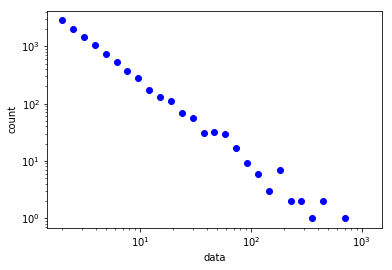

In [41]:
hist, edges = np.histogram(
    data,
    bins=logbins)

plt.plot(edges[:-1], hist, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('data')
plt.ylabel('count')
plt.show()

## Mapas de calor

Outra visualização muito informativa é o mapa de calor. Normalmente usamos os mapas de calor quando queremos visualizar a intensidade de algum atributo ao longo de uma topologia bidimensional (um mapa, um plano cartesiano, uma matriz).

Considere, por exemplo, uma matriz de números aleatórios entre `-2` e `10`. Cada célula da matriz pode indicar uma região no espaço e o seu valor a temperatura média nessa região. Ignore, por enquanto, que esse modelo está completamente errado.

In [42]:
import random

A = [[random.randrange(-2, 10)
      for _ in range(5)] 
      for _ in range(5)]
print(A)

[[0, -2, 7, 6, -1], [-1, 6, 0, 8, 6], [-1, 3, 3, 9, 6], [4, -2, 7, 2, -1], [1, -1, 5, 1, 1]]


Vamos acostumar a usar o módulo `numpy`, que tornará a nossa vida muito mais fácil:

Para plotarmos o mapa de calor, basta usar a função `imshow`.

Se quiser visualizar o que significa cada cor, use a função `colorbar`.

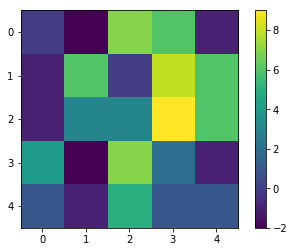

In [43]:
plt.imshow(A)
plt.colorbar()
plt.show()

Se quiser alterar as cores, há [muitas opções](https://matplotlib.org/users/colormaps.html) disponíveis para você:

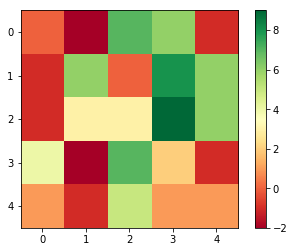

In [44]:
import matplotlib
plt.imshow(A, cmap=matplotlib.cm.RdYlGn)
plt.colorbar()
plt.show()

E se você quiser modificar a escala de cores, use os parâmetros `vmin` e `vmax`.

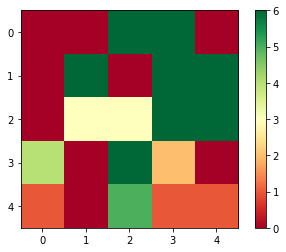

In [45]:
plt.imshow(A, 
           cmap=matplotlib.cm.RdYlGn,
           vmin=0, vmax=6)
plt.colorbar()
plt.show()

Isso é suficiente para você começar a realizar visualizações de dados. Aprenderemos muito mais sobre visualização ao longo do curso.

## Para explorações futuras

* [seaborn](http://stanford.io/1ycOjdI) é construída em cima da `matplotlib` e permite que você facilmente produza visualizações mais bonitas (e mais complexas).

* [plotly](https://plot.ly/python/) é outra biblioteca muito usada, que na maioria dos casos é capaz de gerar gráficos mais bonitos que a  `matplotlib`.

* [D3.js](http://d3js.org) é uma biblioteca JavaScript para produzir visualizações interativas sofisticadas para a web. Embora não seja em Python, é ao mesmo tempo moderna e amplamente usada, e vale bem a pena se familiarizar com ela.

* [Bokeh](http://bokeh.pydata.org) é uma nova biblioteca que traz visualizações no estilo D3 para o Python.

* [ggplot](http://bit.ly/1ycOk1u) é uma interface em Python para a popular biblioteca `ggplot2` do `R`, que é amplamente usada para criar gráficos com "qualidade de publicação". Provavelmente é mais interessante para aqueles que são ávidos usuários do `ggplot2`.

* O Capítulo 4 do livro [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) do Jake VanderPlas explica muito bem como gerar visualizações mais sofisticadas.